In [1]:
import numpy as np # Library for linear algebra and math utils
import pandas as pd # Dataframe library

import matplotlib.pyplot as plt # Library for plots
from utils import confidence_ellipse # Function to add confidence ellipses to charts

In [2]:
data = pd.read_csv('bayes_features.csv'); # Load the data from the csv file

data.head(5) # Print the first 5 tweets features. Each row represents a tweet

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


Text(0, 0.5, 'Negative')

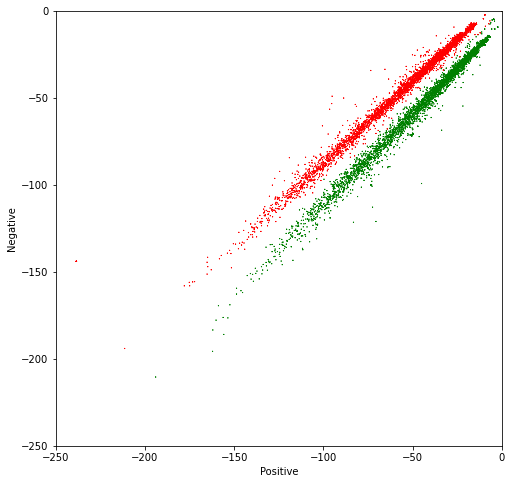

In [3]:
# Plot the samples using columns 1 and 2 of the matrix

fig, ax = plt.subplots(figsize = (8, 8)) #Create a new figure with a custom size

colors = ['red', 'green'] # Define a color palete

# Color base on sentiment
ax.scatter(data.positive, data.negative, 
    c=[colors[int(k)] for k in data.sentiment], s = 0.1, marker='*')  # Plot a dot for each tweet

# Custom limits for this chart
plt.xlim(-250,0)
plt.ylim(-250,0)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

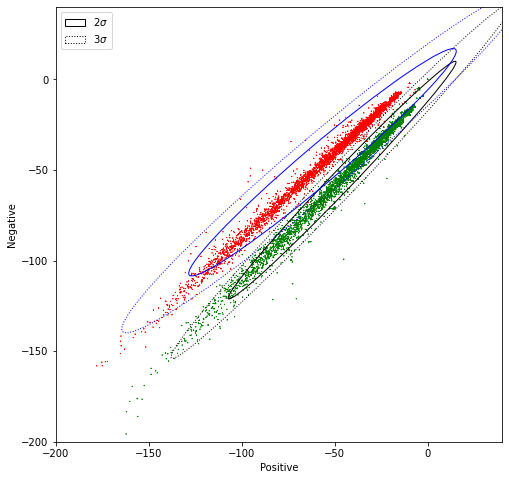

In [10]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # Define a color palete

# Color base on sentiment

ax.scatter(data.positive, data.negative, c=[colors[int(k)] for k in data.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet

# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data[data.sentiment == 1] # Filter only the positive samples
data_neg = data[data.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='blue')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='blue', linestyle=':')
ax.legend()

plt.show()


In [5]:
data2 = data.copy() # Copy the whole data frame

# The following 2 lines only modify the entries in the data frame where sentiment == 1
data2.negative[data.sentiment == 1] =  data2.negative * 1.5 + 50 # Modify the negative attribute
data2.positive[data.sentiment == 1] =  data2.positive / 1.5 - 50 # Modify the positive attribute

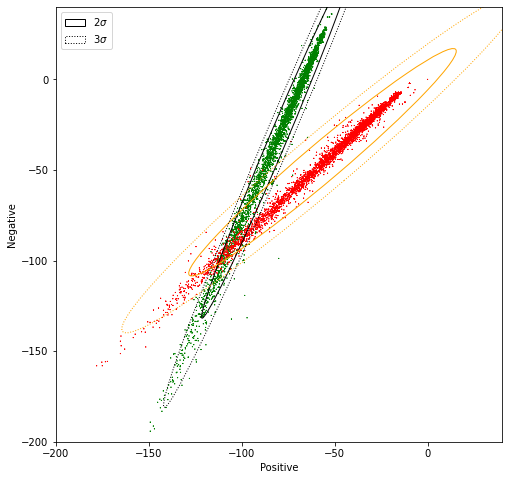

In [6]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # Define a color palete

# Color base on sentiment

#data.negative[data.sentiment == 1] =  data.negative * 2

ax.scatter(data2.positive, data2.negative, c=[colors[int(k)] for k in data2.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet
# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data2[data2.sentiment == 1] # Filter only the positive samples
data_neg = data[data2.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend()

plt.show()